In [71]:
# Import library depdendencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [72]:
# Import flapping_fin_data
data = pd.read_csv("data/flutter_data_set.csv")

data.head()

,M,Vf,DC
0,0.778,1.696,-0.091831
1,0.667,0.533,0.056686
2,0.750,0.900,0.006096
3,0.700,1.300,0.012506
4,0.667,1.216,0.045172


In [73]:
# Make new column: "FO" (flutter occurence) based on sign of DC
data["FO"] = (1 - data["DC"] / abs(data["DC"])) / 2

In [74]:
# Split X and y
y = data["DC"]
X = data[["M", "Vf"]]

In [75]:
# Split train-test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Y_test = (1 - y_test / abs(y_test)) / 2

In [76]:
# Use regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
Y_pred_lr = (1 - y_pred_lr / abs(y_pred_lr)) / 2

In [77]:
# Scale the input data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Create new a knn model
knn2 = KNeighborsRegressor()

# Create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

# Use GridSearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=20)

# Fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=20, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [79]:
knn_gscv.best_params_["n_neighbors"]

1

In [80]:
# Use KNN model
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=knn_gscv.best_params_["n_neighbors"])

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
Y_pred_knn = (1 - y_pred_knn / abs(y_pred_knn)) / 2

In [81]:
# Check score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)

scores = pd.DataFrame({
    "Model": ("LR", "LR", "KNN", "KNN"),
    "Score": ("Accuracy", "F1", "Accuracy", "F1"),
    "Value": (accuracy_lr, f1_lr, accuracy_knn, f1_knn)
})

In [82]:
scores.set_index(["Model", "Score"], inplace=True)

In [83]:
scores

Value
Model Score             
LR    Accuracy  0.833333
      F1        0.800000
KNN   Accuracy  0.883333
      F1        0.862745

<Axes: >

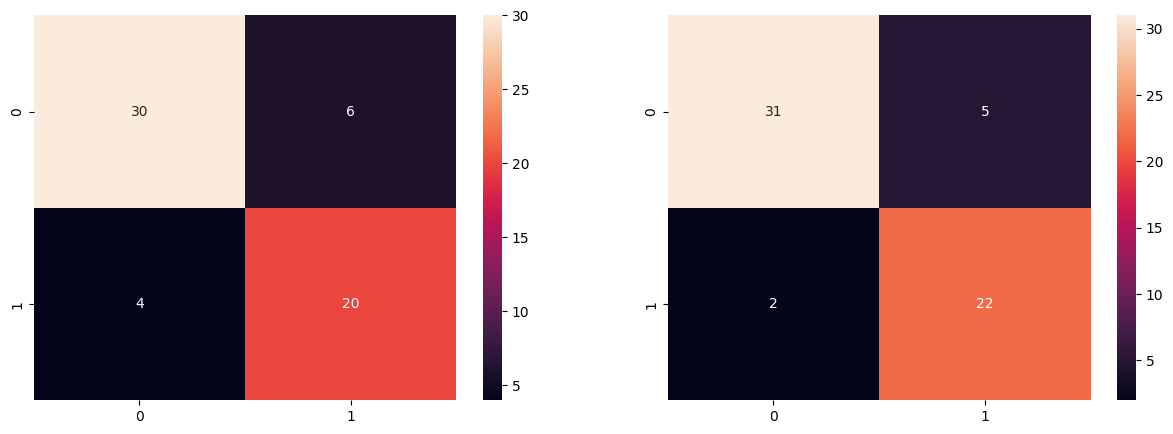

In [84]:
# Draw the confusion matrix
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(Y_test, Y_pred_lr)
cm_knn = confusion_matrix(Y_test, Y_pred_knn)

# Initialize figure
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', ax=ax[0])
sns.heatmap(cm_knn, annot=True, fmt='d', ax=ax[1])

c:\Users\hafiz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


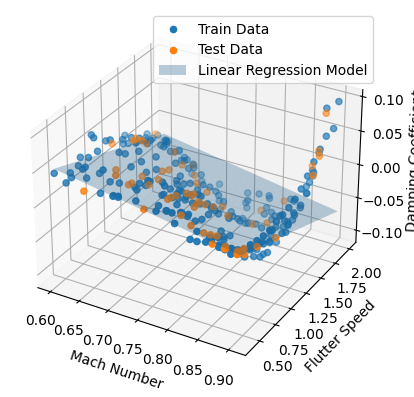

In [85]:
# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the training data with scater plot
X1_train = X_train['M']
X2_train = X_train['Vf']
train_scatter = ax.scatter(X1_train, X2_train, y_train, label='Train Data')

# Plot the test data with scater plot
X1_test = X_test['M']
X2_test = X_test['Vf']
test_scatter = ax.scatter(X1_test, X2_test, y_test, label='Test Data')

# # Plot the samples with scatter plot with orange color
# X1 = X['percentage_ac']
# X2 = X['flapfreq']
# samples_scatter = ax.scatter(X1, X2, y, label='Samples', color='orange')

# Create linear space, meshgrid, and vectos
X1_range = np.linspace(X['M'].min(), X['M'].max(), 100)
X2_range = np.linspace(X['Vf'].min(), X['Vf'].max(), 100)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)
X1_vec = X1_mesh.reshape(-1,)
X2_vec = X2_mesh.reshape(-1,)
X_vec = np.array([X1_vec, X2_vec]).T
y_vec_lr = lr.predict(X_vec)
y_mesh_lr = y_vec_lr.reshape(X1_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_mesh, X2_mesh, y_mesh_lr, alpha=0.3, label='Linear Regression Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Mach Number')
ax.set_ylabel('Flutter Speed')
ax.set_zlabel('Damping Coefficient')

# Show legend
ax.legend()

ax.view_init()

plt.show()

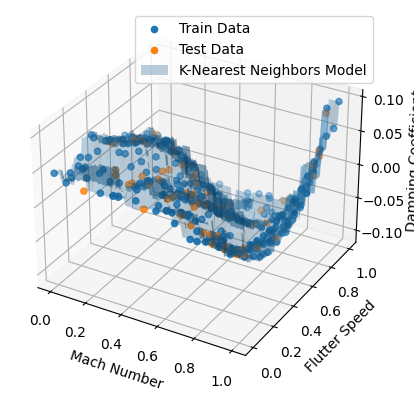

In [86]:
# Plot the result
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scaled training data with scater plot
X1_train_scaled = X_train_scaled[:,0]
X2_train_scaled = X_train_scaled[:,1]
train_scatter_scaled = ax.scatter(X1_train_scaled, X2_train_scaled, y_train, label='Train Data')

# Plot the scaled test data with scater plot
X1_test_scaled = X_test_scaled[:,0]
X2_test_scaled = X_test_scaled[:,1]
test_scatter_scaled = ax.scatter(X1_test_scaled, X2_test_scaled, y_test, label='Test Data')

# Create linear space, meshgrid, and vectos
X1_scaled_range = np.linspace(0, 1, 100)
X2_scaled_range = np.linspace(0, 1, 100)
X1_scaled_mesh, X2_scaled_mesh = np.meshgrid(X1_scaled_range, X2_scaled_range)
X1_scaled_vec = X1_scaled_mesh.reshape(-1,)
X2_scaled_vec = X2_scaled_mesh.reshape(-1,)
X_scaled_vec = np.array([X1_scaled_vec, X2_scaled_vec]).T
y_vec_knn = knn.predict(X_scaled_vec)
y_mesh_knn = y_vec_knn.reshape(X1_scaled_mesh.shape)

# Plot the result with surface plot
surf = ax.plot_surface(X1_scaled_mesh, X2_scaled_mesh, y_mesh_knn, alpha=0.3, label='K-Nearest Neighbors Model')
surf._facecolors2d=surf._facecolor3d
surf._edgecolors2d=surf._edgecolor3d

# Set the label
ax.set_xlabel('Mach Number')
ax.set_ylabel('Flutter Speed')
ax.set_zlabel('Damping Coefficient')

# Show legend
ax.legend()

ax.view_init()

plt.show()

c:\Users\hafiz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


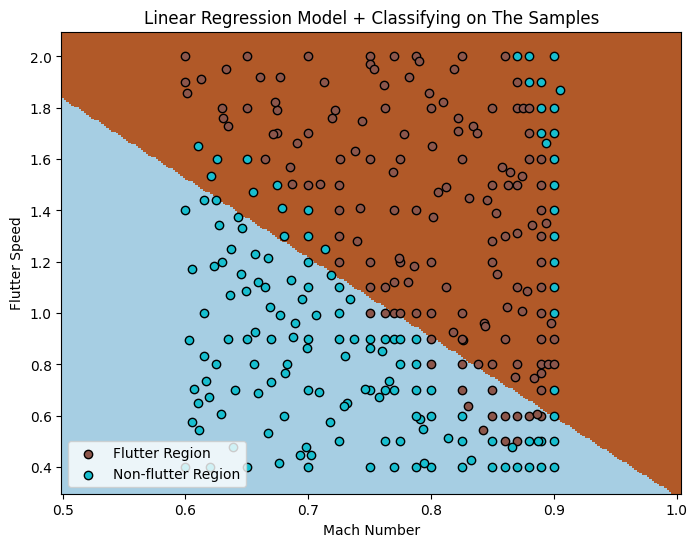

In [87]:
#Create the location of X to visualize
X1_min, X1_max = X['M'].min()-0.1, X['M'].max()+0.1
X2_min, X2_max = X['Vf'].min()-0.1, X['Vf'].max()+0.1

h1 = (X1_max-X1_min)/250
h2 = (X2_max-X2_min)/250

# Calculate prediction at each prediction location
XX1, XX2 = np.meshgrid(np.arange(X1_min, X1_max, h1), np.arange(X2_min, X2_max, h2))
X_norm = np.c_[XX1.ravel(), XX2.ravel()]

# Scale X for KNN model
Y = lr.predict(X_norm)
y = (1 - Y / abs(Y)) / 2

# Put the result into a color plot
y = y.reshape(XX1.shape)

plt.figure(1, figsize=(8, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(XX1, XX2, y)

flut = data.loc[data["FO"] == 1]
no_flut = data.loc[data["FO"] == 0]
plt.scatter(flut["M"],flut["Vf"],label='Flutter Region',c='tab:brown',edgecolors='k')
plt.scatter(no_flut["M"],no_flut["Vf"],label='Non-flutter Region',c='tab:cyan',edgecolors='k')

plt.xlabel('Mach Number')
plt.ylabel('Flutter Speed')

plt.title('Linear Regression Model + Classifying on The Samples')

plt.legend()

plt.show()

c:\Users\hafiz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


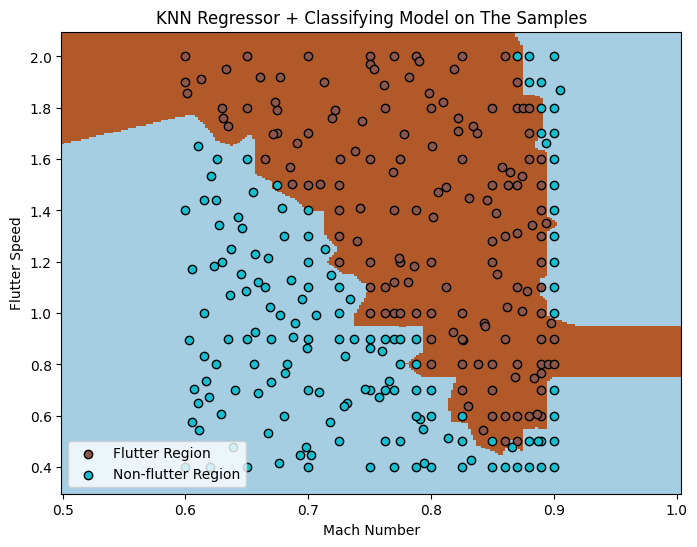

In [88]:
#Create the location of X to visualize
X1_min, X1_max = X['M'].min()-0.1, X['M'].max()+0.1
X2_min, X2_max = X['Vf'].min()-0.1, X['Vf'].max()+0.1

h1 = (X1_max-X1_min)/250
h2 = (X2_max-X2_min)/250

# Calculate prediction at each prediction location
XX1, XX2 = np.meshgrid(np.arange(X1_min, X1_max, h1), np.arange(X2_min, X2_max, h2))
X_norm = np.c_[XX1.ravel(), XX2.ravel()]

# Scale X for KNN model
scaler_X = MinMaxScaler()
scaler_X.fit(X)
X_norm = scaler_X.transform(X_norm)
Y = knn.predict(X_norm)
y = (1 - Y / abs(Y)) / 2

# Put the result into a color plot
y = y.reshape(XX1.shape)

plt.figure(1, figsize=(8, 6))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(XX1, XX2, y)

flut = data.loc[data["FO"] == 1]
no_flut = data.loc[data["FO"] == 0]
plt.scatter(flut["M"],flut["Vf"],label='Flutter Region',c='tab:brown',edgecolors='k')
plt.scatter(no_flut["M"],no_flut["Vf"],label='Non-flutter Region',c='tab:cyan',edgecolors='k')

plt.xlabel('Mach Number')
plt.ylabel('Flutter Speed')

plt.title('KNN Regressor + Classifying Model on The Samples')

plt.legend()

plt.show()